In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv(r'C:\Users\sreejayan\Desktop\assignment\titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Check the basic details of the dataset

In [6]:
# Display the first few rows of the dataset
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get an overview of the dataset, including column names, data types, and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.shape

(891, 11)

# 2. Do all the necessary pre-processing steps

Fill in all the missing values present in all the columns in the dataset:

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Age'].head(20)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
11     4.0
12    58.0
13    20.0
14    39.0
15    14.0
16    55.0
17     2.0
18     NaN
19    31.0
20     NaN
Name: Age, dtype: float64

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Fill missing values in numerical columns with the column mean
data.fillna(data.mean(), inplace=True)


In [14]:
# Fill missing values in categorical columns with the most frequent value
data.fillna(data.mode().iloc[0], inplace=True)

In [15]:
data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [17]:
data.fillna(data.mode(), inplace=True)

In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


 Check and handle outliers in at least 3 columns in the dataset

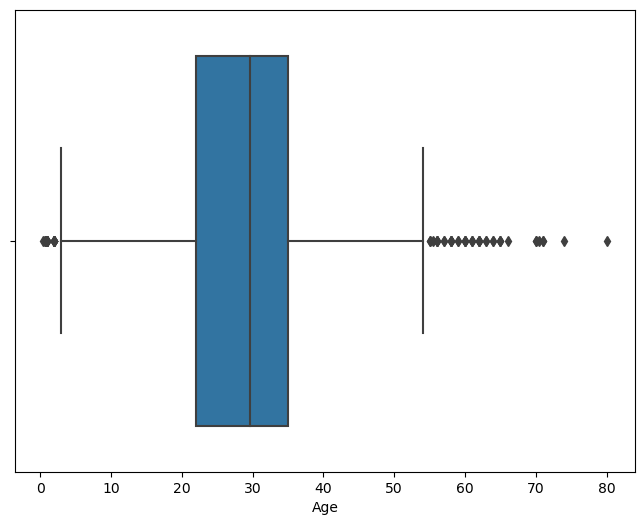

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=data["Age"])
plt.show()


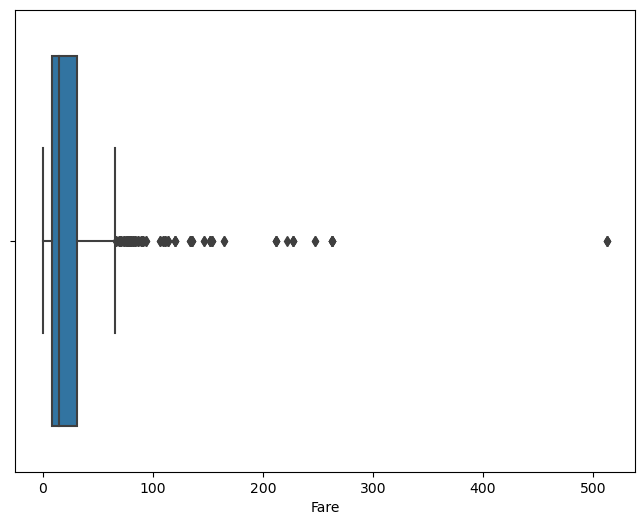

In [21]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x=data['Fare'])
plt.show()


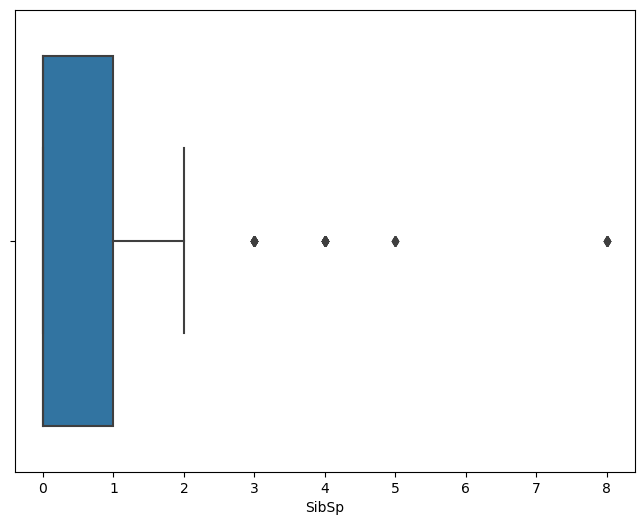

In [22]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x=data['SibSp'])
plt.show()

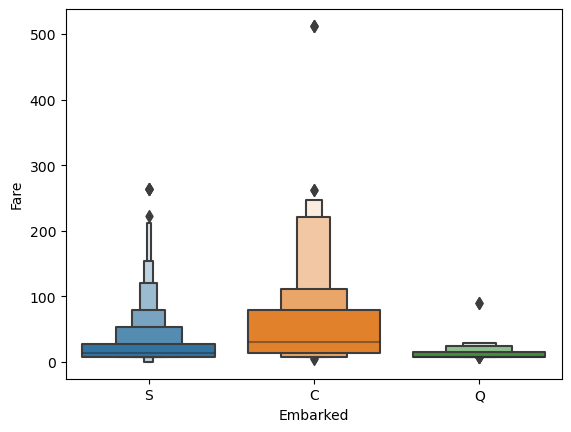

In [23]:
sns.boxenplot(y="Fare", x="Embarked", data=data)
plt.show()

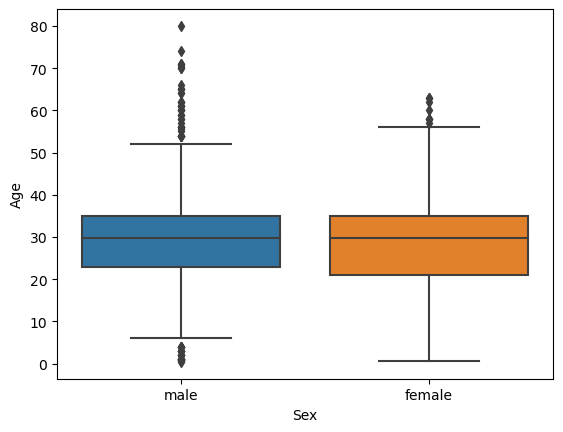

In [24]:
sns.boxplot(x='Sex', y = 'Age',data= data)
plt.show()


drop invalid columns

In [25]:
data=data.drop(['Name','Ticket','Cabin'],axis=1)

# droping outlier from  the column SibSp

In [26]:
Q1 =data['SibSp'].quantile(0.25)
Q3 =data['SibSp'].quantile(0.75)
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upr=Q3+(1.5*IQR)
out_ind=data[(data['SibSp'] > upr) | (data['Fare'] < low) ].index
data.drop(out_ind,inplace= True)

In [27]:
data.shape

(845, 8)

# Flooring And Capping are done in Age  and Fare columns

In [28]:
for column in ['Age' , 'Fare'] :
    Q1 =data[column].quantile(0.25)
    Q3 =data[column].quantile(0.75)
    IQR=Q3 - Q1
    low=Q1 - (1.5*IQR)
    upr=Q3 + (1.5*IQR)
    data[column]=np.where(data[column] > upr, upr,np.where(data[column]< low,low,data[column]))

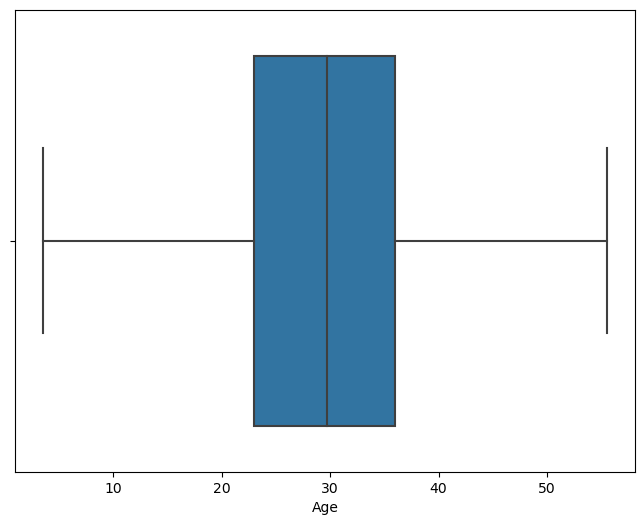

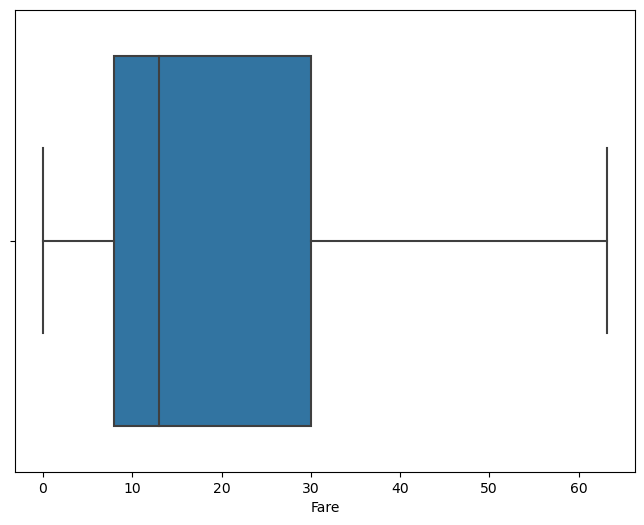

In [29]:
for col in ['Age' , 'Fare']:
    plt.subplots(figsize=(8, 6))

    sns.boxplot(x=data[col])
    plt.show()


modell training

In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


Encoding categorical variables

In [31]:

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


Splitting into features and target variable

In [32]:

X = data.drop('Survived', axis=1)
y = data['Survived']


In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[ 0.8580921 ,  0.72855823, -0.7079618 , ..., -0.41438433,
        -0.79532468,  0.60157207],
       [-1.5231487 , -1.37257388,  0.66578345, ..., -0.41438433,
         2.03918983, -1.88414138],
       [ 0.8580921 , -1.37257388, -0.36452549, ..., -0.41438433,
        -0.7611014 ,  0.60157207],
       ...,
       [ 0.8580921 , -1.37257388, -0.04692266, ...,  2.19871087,
         0.02603418,  0.60157207],
       [-1.5231487 ,  0.72855823, -0.36452549, ..., -0.41438433,
         0.35812681, -1.88414138],
       [ 0.8580921 ,  0.72855823,  0.15062898, ..., -0.41438433,
        -0.7699741 , -0.64128465]])

In [35]:
#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Create kNN and SVM models:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')

In [37]:
from sklearn.metrics import accuracy_score

# Fit kNN model
knn.fit(X_train, y_train)

# Predict labels using kNN model
knn_predictions = knn.predict(X_test)

# Calculate accuracy score for kNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Fit SVM model
svm.fit(X_train, y_train)

# Predict labels using SVM model
svm_predictions = svm.predict(X_test)

# Calculate accuracy score for SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print accuracy scores
print("kNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)

kNN Accuracy: 0.8106508875739645
SVM Accuracy: 0.8402366863905325


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [39]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Define the number of folds
k = 5

# k-fold cross-validation
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)
k_fold_scores = cross_val_score(knn, X_scaled, y, cv=k_fold)
average_k_fold_accuracy = k_fold_scores.mean()

# stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
stratified_kfold_scores = cross_val_score(svm, X_scaled, y, cv=stratified_kfold)
average_stratified_kfold_accuracy = stratified_kfold_scores.mean()

# Print the average accuracy scores
print("Average accuracy score (k-fold):", average_k_fold_accuracy)
print("Average accuracy score (stratified k-fold):", average_stratified_kfold_accuracy)

Average accuracy score (k-fold): 0.7810650887573964
Average accuracy score (stratified k-fold): 0.7940828402366863
